In [63]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [64]:
df_basic = pd.DataFrame(columns=['number', 'tws size', "elapsed"])

with open('./time_results/results_det.txt', 'r') as file:
    for line in file.readlines():
        line_list = line.split()
        if line_list != []:
            if line_list[0] == 'tws':
                line_temp = {'number' : [int(line_list[8])], 'tws size': [line_list[11]],  "elapsed":[line_list[2]] }
                df_temp = pd.DataFrame(line_temp)
                df_basic = pd.concat([df_basic, df_temp ])
                
df_basic.set_index("number", inplace=True)
print(df_basic.shape)
df_basic
             

(42, 2)


,tws size,elapsed
number,,
0,4,15
1,5,28
2,7,30
3,9,37
4,11,39
5,13,52
6,16,53
7,20,81
8,23,79


In [65]:
df_opt = pd.DataFrame(columns=['number', 'tws size', "elapsed"])

with open('./time_results/results_opt.txt', 'r') as file:
    for line in file.readlines():
        line_list = line.split()
        if line_list != []:
            if line_list[0] == 'tws':
                line_temp = {'number' : [int(line_list[8])], 'tws size': [line_list[11]],  "elapsed":[line_list[2]] }
                df_temp = pd.DataFrame(line_temp)
                df_opt = pd.concat([df_opt, df_temp ])
df_opt.set_index("number", inplace=True)
print(df_opt.shape)
df_opt

(42, 2)


,tws size,elapsed
number,,
0,4,16
1,5,20
2,7,20
3,9,16
4,11,36
5,13,33
6,16,45
7,20,49
8,23,56


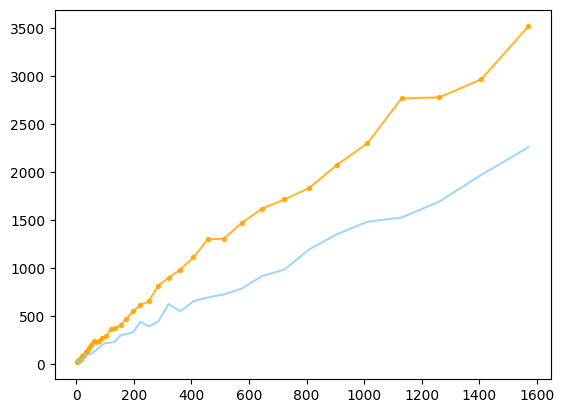

In [70]:
bar_width = 30
opacity = 0.8
fig, ax = plt.subplots(1,1)
ax.plot(
        df_basic["tws size"].astype(int), 
        df_basic["elapsed"].astype(int), 
        # width=bar_width, 
        color='orange', 
        alpha=opacity, 
        # edgecolor='grey',
        marker='.',
        label='Basic',

        )

ax.plot(
        df_basic["tws size"].astype(int), 
        df_opt["elapsed"].astype(int),
        #  width=bar_width, 
        color='lightskyblue', 
        alpha=opacity, 
        #  edgecolor='grey',
        marker='.',
        label='Optimaized',
        )


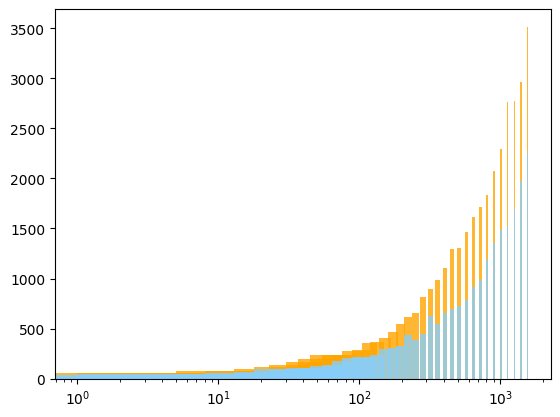

In [73]:
fig, ax = plt.subplots(1,1)

ax.bar(
        df_basic["tws size"].astype(int), 
        df_basic["elapsed"].astype(int), 
        width=bar_width, 
        color='orange',  
        alpha=opacity, 
        # edgecolor='grey', 
        label='Basic'
        )
ax.bar(
        df_opt["tws size"].astype(int), 
        df_opt["elapsed"].astype(int),
        width=bar_width, 
        color='lightskyblue',  
        alpha=opacity, 
        # edgecolor='grey', 
        label='Optimaized')
ax.semilogx()

plt.show()
